## What is the most valuable skill to learn for Data Analyst roles?

### Methodology

1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

In [49]:
# Importing necessary libraries, just as before
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast
from datetime import datetime as dt
from datasets import load_dataset

In [50]:
#loading in the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


In [51]:
#Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#lets make sure everything is working correctly
df.head(7)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."


In [56]:
print(df['job_title_short'].unique())  # Check available job titles
print(df['job_work_from_home'].unique())  # Check available remote job values

['Senior Data Engineer' 'Data Analyst' 'Data Engineer' 'Business Analyst'
 'Data Scientist' 'Machine Learning Engineer' 'Senior Data Analyst'
 'Cloud Engineer' 'Senior Data Scientist' 'Software Engineer']
[False  True]


## Quickly, because I am looking for a remote position, lets see which month is the best for Junior Data Analyst roles

In [60]:
#This is to make the data more specific to my interests
df_JDA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_work_from_home'] == True)].copy()

df_JDA['job_posted_date'] = pd.to_datetime(df_JDA['job_posted_date'], format='mixed')

df_JDA['job_posted_month'] = df_JDA['job_posted_date'].dt.strftime('%m')

df_JDA



,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin...",06
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,"[sql, python, r, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ...",08
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'...",06
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",10
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin...",03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784501,Data Analyst,Data Analyst,Anywhere,via LinkedIn,Full-time,True,Pakistan,2023-09-28 06:16:17,False,False,Pakistan,None,NaN,NaN,flowershop.ae,"[sql, python, excel, sheets]","{'analyst_tools': ['excel', 'sheets'], 'progra...",09
785207,Data Analyst,Data Governance Analyst,Anywhere,via LinkedIn,Full-time,True,India,2023-12-28 06:10:11,True,False,India,None,NaN,NaN,Ascendion,[jira],{'async': ['jira']},12
785423,Data Analyst,Data Entry Research Analyst (Remote),Anywhere,via LinkedIn,Full-time,True,"California, United States",2023-01-16 06:00:36,False,True,United States,None,NaN,NaN,ClevRecruity,"[sql, excel, sheets, tableau, power bi]","{'analyst_tools': ['excel', 'sheets', 'tableau...",01
785485,Data Analyst,Data Quality Analyst,Anywhere,via LinkedIn,Full-time,True,United Kingdom,2023-10-04 06:09:44,False,False,United Kingdom,None,NaN,NaN,Viatris,"[sql, sql server, excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint'], 'da...",10


C:\Users\Geoff\AppData\Local\Temp\ipykernel_30820\4273258792.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_JDA, x='job_posted_month', ax=ax, palette='dark:g_r')


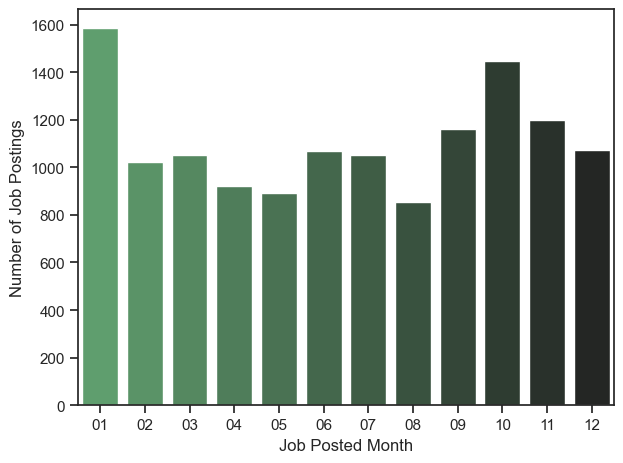

In [61]:
#Now to graph this data

# Define the correct month order
month_order = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

df_JDA['job_posted_month'] = pd.Categorical(df_JDA['job_posted_month'], categories=month_order, ordered=True)

#now let us plot this
fig, ax = plt.subplots(1,1)
sns.set_theme(style='whitegrid')
sns.countplot(data=df_JDA, x='job_posted_month', ax=ax, palette='dark:g_r')
ax.set_ylabel('Number of Job Postings')
ax.set_xlabel('Job Posted Month')


plt.tight_layout()
plt.show()

### Now it looks like we have most of the job postings for Junior Data Analyst positions occuring in January, and spiking again in October.

### Now back to the task at hand, for this I will stick with US Data again

In [27]:
#I only want to see American jobs in Data Analysis, so I'll filter for them
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [28]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg','job_skills']].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [29]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


### Lets see what skills show up in job listings

In [30]:
DA_job_count = len(df_DA_US)

#This line is here to get the percent of skills that show up in job listings
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [31]:
#This line is here to set a minimum percent of occurances, so rare skills aren't counted
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

#lets see how many jobs are above 5%
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


### Now lets graph this information

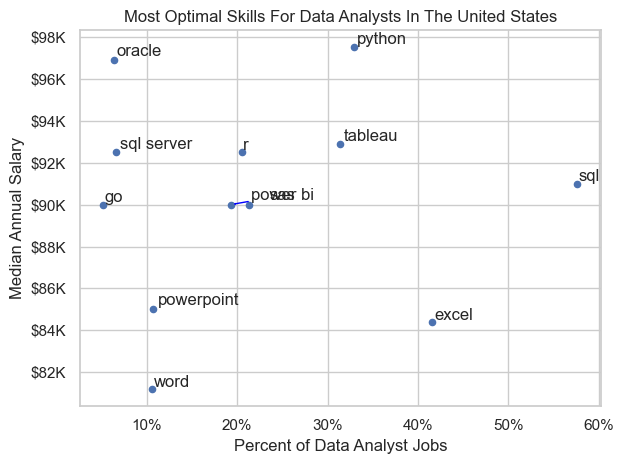

In [32]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# This line is here to prepare texts for the adjustText library
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

#adjust text (do deal with overlapping in the graph)
adjust_text(texts, arrowprops=dict(arrowstyle='->', color= 'blue'))

#now to set up the graph
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Annual Salary')
plt.title('Most Optimal Skills For Data Analysts In The United States')

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()


### Now lets look at skill types as categorized by these job listings

In [33]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['esquisse',
  'ms access',
  'datarobot',
  'looker',
  'outlook',
  'visio',
  'msaccess',
  'cognos',
  'tableau',
  'sharepoint',
  'alteryx',
  'sheets',
  'qlik',
  'dax',
  'powerbi',
  'nuix',
  'splunk',
  'excel',
  'spss',
  'power bi',
  'word',
  'powerpoint',
  'ssrs',
  'microstrategy',
  'spreadsheet',
  'sas',
  'sap',
  'ssis'],
 'programming': ['lua',
  'php',
  'bash',
  'nosql',
  'apl',
  'html',
  'mongo',
  'typescript',
  'fortran',
  'assembly',
  'clojure',
  'kotlin',
  'javascript',
  'solidity',
  'dart',
  'java',
  'julia',
  'delphi',
  'python',
  'visualbasic',
  'shell',
  'groovy',
  'sass',
  'go',
  'erlang',
  'c++',
  'vba',
  'c',
  'cobol',
  'pascal',
  'matlab',
  'perl',
  'rust',
  'vb.net',
  'objective-c',
  'haskell',
  'ocaml',
  'f#',
  'elixir',
  'powershell',
  'mongodb',
  'visual basic',
  'ruby',
  'sql',
  'css',
  'no-sql',
  'lisp',
  't-sql',
  'swift',
  'c#',
  'crystal',
  'sas',
  'r',
  'golang',
  'sc

In [34]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,esquisse
0,analyst_tools,ms access
0,analyst_tools,datarobot
0,analyst_tools,looker
0,analyst_tools,outlook
...,...,...
9,sync,twilio
9,sync,wire
9,sync,symphony
9,sync,google chat


### Now lets merge some databases, I can do this in SQL but since this is a python project I'll do it pythonically

In [35]:
# Merging the dataframes
df_plot = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


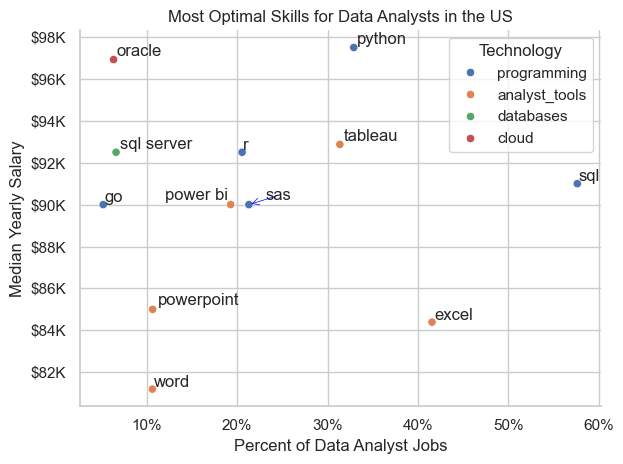

In [36]:
#To limit the number of skills
df_plot = df_plot[df_plot['skill_percent'] > skill_percent]

# plotting with Seaborn
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text( texts, arrowprops=dict(arrowstyle='->', color='blue', lw=0.5), only_move={'points': 'y', 'text': 'xy'}, expand_points=(1.2, 1.2), expand_text=(1.2, 1.2),  
            force_text=10, force_points=0.5, lim=500)

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()